# Exploring Telco Customer Churn
The main goal of this notebook is to analyze the various aspects of Telco Customer churn via the means of visualization and outline a *profile* of a user that leaves the service of the telecom.

## 1. Importing Libraries and Loading data

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Loading the data
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [206]:
# displaying the head
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# get the various factor levels
for column in list(df.columns):
    # skip the first column as it will contain unique numbers
    if column == 'customerID':
        pass
    else:
        print(column, df[column].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

From the displaying the factors and the information about the types of the columns of the dataset it seems that are some mismatches:
1. `SeniorCitizen` - the type is int, however the column just indicates whether a person is a senior citizen or not with values of either 1 or 0. It should be fine as is.
2. `TotalCharges` - the type is object, however it would indicate that this column contains the sum of all of the charges to a customer. This should be `float`.

In [22]:
def assign_correct_type(data):
    '''
        First try to correct the type by pandas means.
        If the first fails go through each of the rows of the datasets and try to assign it to a `float` type - if that fails assign the value from the monthly charge multiplied by the tenure.
        Returns the corrected dataframe.
    '''
    try:
        data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric)
    except:
        for row in df.iterrows():
            try:
                data.loc[row[0], 'TotalCharges'] = float(row[1]['TotalCharges'])
            except:
                data.loc[row[0], 'TotalCharges'] = row[1]['MonthlyCharges'] * row[1]['tenure']
    
    data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric)
    
    return data

In [23]:
df = assign_correct_type(df)

Let's check the types again just to be sure.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

All good.

## 2. Checking for missing data.

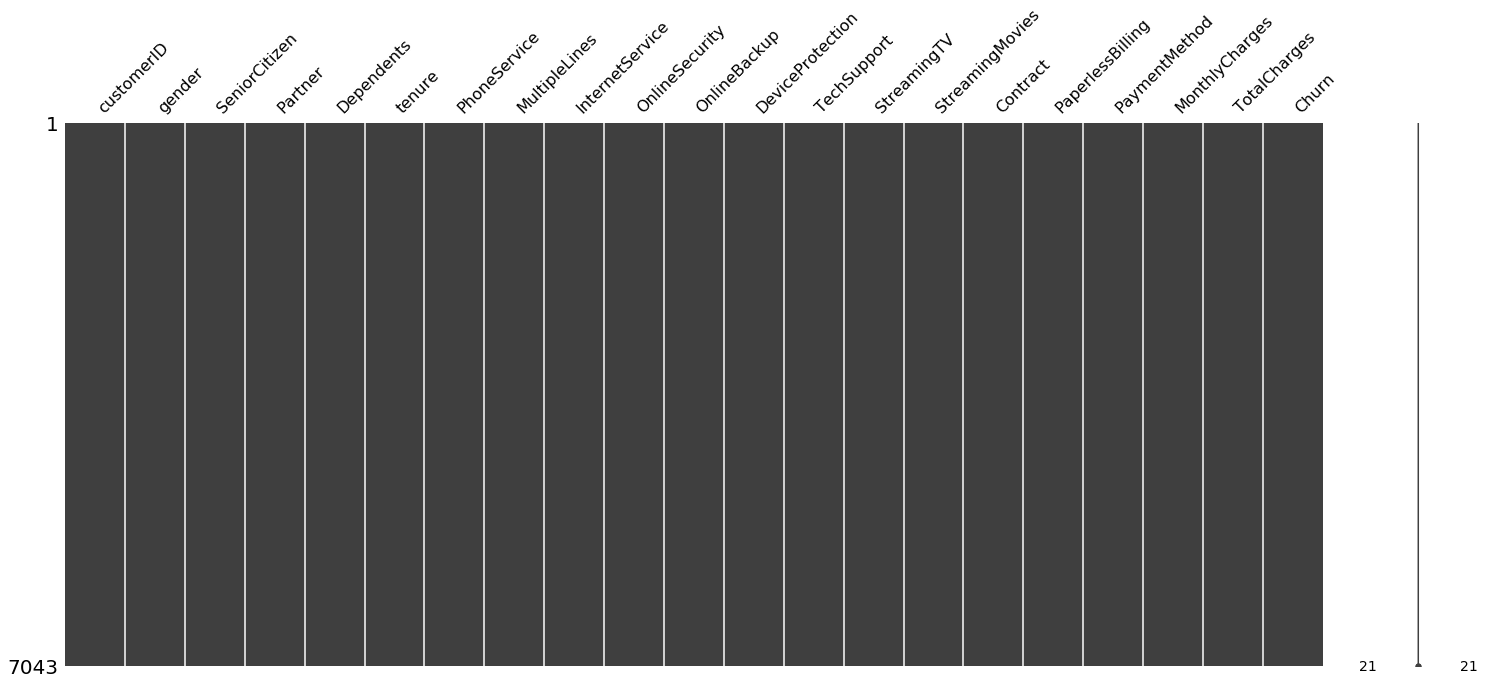

In [25]:
import missingno as msno
msno.matrix(df)

A clean data set = pure joy.

## 3. Exploratory Data Analysis
Let's start by exploring the simple questions like - are senior citizens more likely to stay with the telecom, or which of the two genders is more likely to leave? The point is to get a feel for the different categories and how they contribute to the `churn`.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

### 3.1 Categoricals' effect on the churn rate.

In [81]:
def display_features(plot_type, feature_array, dframe):
    _, axes = plt.subplots(1, len(feature_array), figsize=(25,5))
    if plot_type == 'count':
        i = 0
        for item in feature_array:
            sns.countplot(x=item, hue='Churn', data=dframe, ax=axes[i])
            i += 1
        plt.show()
        
    elif plot_type =='bar':
        plot = 0
        y, hue = 'prop', 'Churn'
        for item in feature_array:
            x = item
            prop_df = (dframe[x]
                  .groupby(dframe[hue])
                  .value_counts(normalize=True)
                  .rename(y)
                  .reset_index())
            sns.barplot(x=x,y=y, hue=hue, data=prop_df, ax=axes[plot])
            plot += 1
        plt.show()

In [292]:
def display_features_perc(feature_array, dframe,orientation='horizontal'):
    if orientation == 'vertical':
        angle = 90
    elif orientation == 'diagonal':
        angle = 45
    elif orientation == 'horizontal':
        angle = 0
    else:
        angle = int(orientation)

    _, axes = plt.subplots(2, len(feature_array), figsize=(25,8))
    i = 0
    y, hue = 'prop', 'Churn'
    for item in feature_array:
        sns.countplot(x=item, hue=hue, data=dframe, ax=axes[0,i])
        plt.setp(axes[0,i].xaxis.get_majorticklabels(), rotation=angle)
        x = item
        prop_df = (dframe[x]
                  .groupby(dframe[hue])
                  .value_counts(normalize=True)
                  .rename(y)
                  .reset_index())
        sns.barplot(x=x,y=y, hue=hue, data=prop_df, ax=axes[1,i])
        plt.setp(axes[1,i].xaxis.get_majorticklabels(), rotation=angle)
        i += 1
        
    plt.show()            

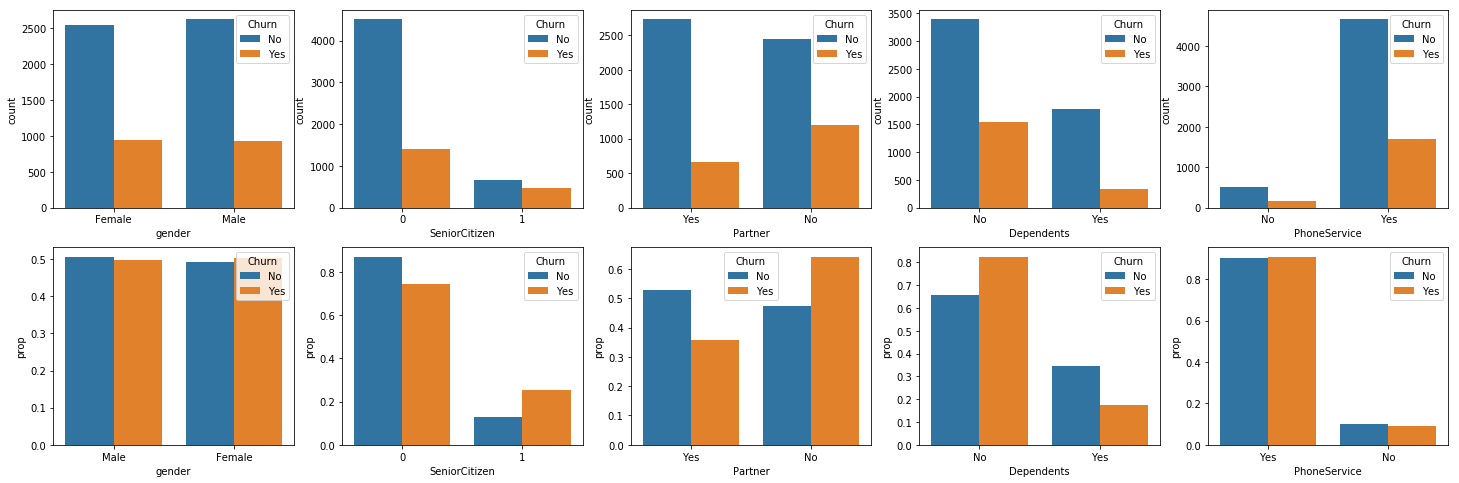

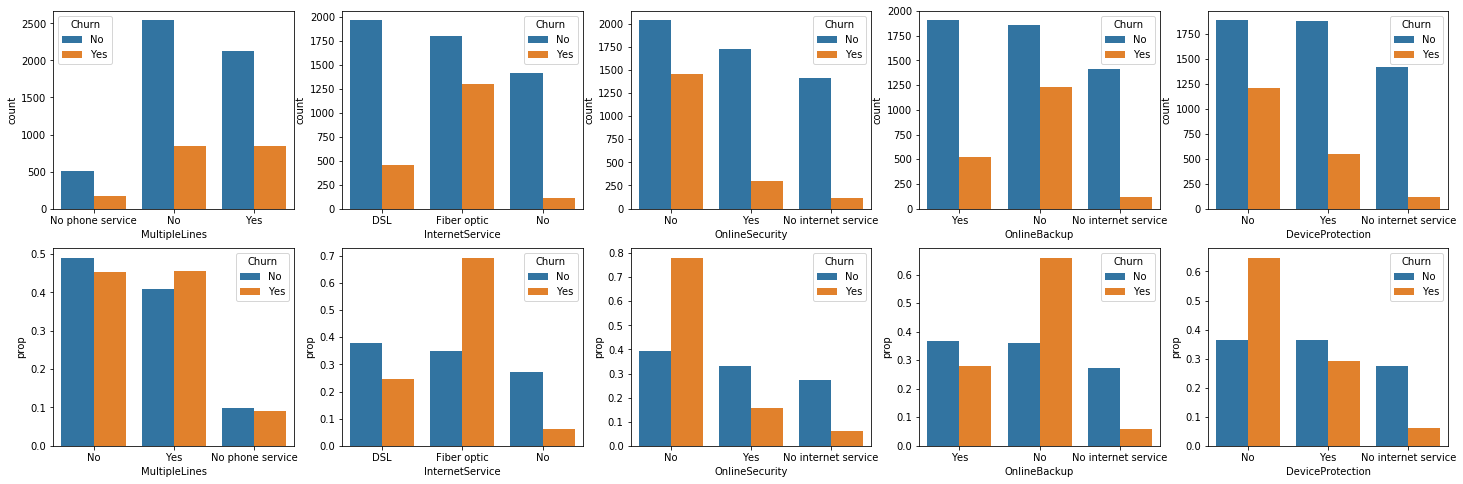

In [293]:
features = ['gender', 'SeniorCitizen','Partner','Dependents', 'PhoneService']
display_features_perc(features, df)
features = ['MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection']
display_features_perc(features, df)

#### Thoughts on first 10 categoricals:
From both the count-plots and the bar plots it seems that:
1. *gender*: Both genders seem equaly likely to leave.
2. *Senior Citizen*: Senior citizens, who leave seem to be more, percentage wise, but looking at the counts the difference is small.
3. *Partner*: From the percentages it seems that people with no partner are more likely to leave than those who have one.
4. *Dependents*: From both counts and percentages it looks like that if a person doesn't have dependents - he's more likely to leave.
5. *Phone Service*: Looking at both plots it seems that it equally likely for a user to leave, whether he has a phone service or not.
6. *MultipleLines*:  Looks like having multiple lines doesn't have a significant effect on churning - both have similar procentages
7. *InternetService*: Having a fiber optic service means that the customer is more likely to churn - roughly 70% of the churners have *fiber optic internet service*
8. *OnlineSecurity*, *OnlineBackupt*, *DeviceProtection*:  From the online services that a customer has it seems that the customers that have no service are more likely to churn.

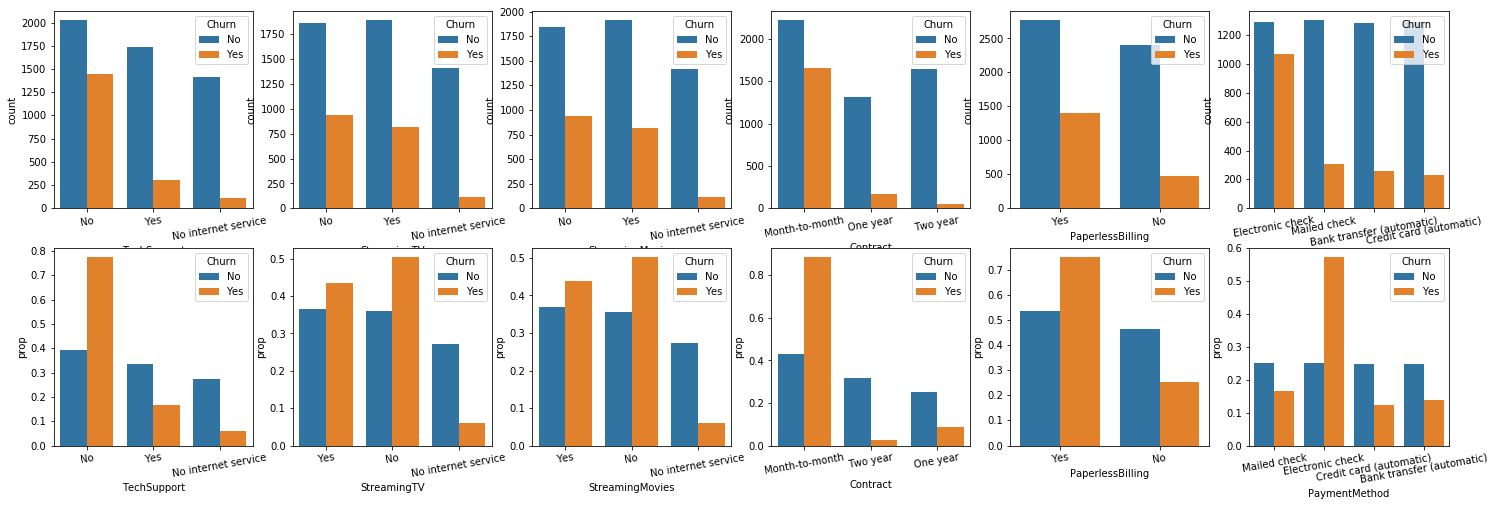

In [297]:
features = ['TechSupport', 'StreamingTV','StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']
display_features_perc(features, df, 10) # 10 degrees label rotation seems optimal

#### Thoughts on the other 6 categoricals:
1. *Tech Support*: Customers that have no tech support are more likely to leave.
2. *StreamingTV*: Roughly similar are the percentages of churn in both customers that have the service, and customers that do not.
3. *StreamingMovies*: The same situation as streaming tv - no difference in the number of leaving clients.
4. *Contract*: 80% of the leaving customers have Month-to-month contracts.
5. *Paperless Biling*: The number of customers that have paperless biling is doulbe of the ones that do not.
6. *Payment Method*: The customers that leave have predominantely (60%) set a payment method as electronic checks.

### 3.2 Correlation plot
An important visualization tool is the correlation plot - the idea is to see if features are correlated to each other.

Before making the correlation plot, we need to encode the categorical variables.

In [118]:
df_enc = df.copy()
categorical_columns = ['gender', 'SeniorCitizen','Partner','Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV','StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod','Churn']
# change the columns to category
df_enc[categorical_columns] = df_enc[categorical_columns].astype('category')
# dropping the customer id
df_enc = df_enc.drop('customerID', axis=1)

In [119]:
# getting the category codes
for category in categorical_columns:
    df_enc[category] = df_enc[category].cat.codes
# getting the correlation matrix
df_cormat = df_enc.corr()

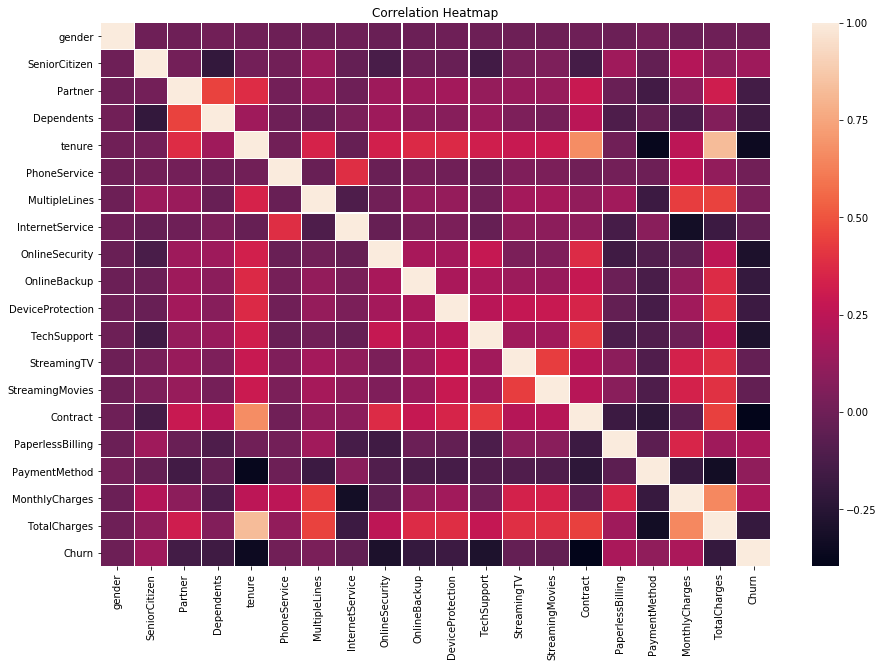

In [128]:
# Correlation heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(df_cormat, linewidths = 0.1)
plt.title('Correlation Heatmap')
plt.show()

Looking at the correlation heatmap it seems there is a strong positive correlation between *tenure* and *Total Charges*, which is to be expected - the longer you are there, the higher the total charges.
I was expecting that the users of online features are similiar, but it seems only a correlation ~0.5 between them.

### 3.3 Numerical Features' effect on Churn

#### 3.3.1 Distributions
For the purpose of investigating the churn with in the numerical features - *tenure*, *Monthly Charges* and *Total Charges* - the KDE plots will be used.

In [163]:
def pdfplot(features):
    _, axes = plt.subplots(1, len(features), figsize=(21,5))
    i = 0
    for feature in features:
        ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature], color = 'Blue', label = 'Churn:No', ax=axes[i])
        ax0.set_title(feature)
        ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature], color = 'Red', label = 'Churn:Yes', ax=axes[i])
        i += 1

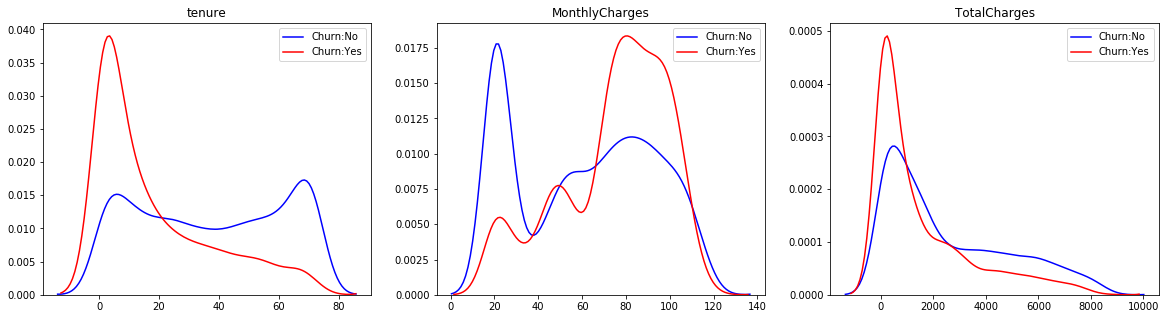

In [299]:
pdfplot(['tenure', 'MonthlyCharges', 'TotalCharges'])

From the *Numerical* features' distributions it seems clear that the lower the amount of years a customer has been with the telecom, the higher the chance the service will be dropped. On the other hand the higher the amount of the Monthly charges the more likely is for a customer to churn.

#### 3.3.2 Monthly Charges in relation with categoricals
The relationship between *Monthly Charges* with the categorical features will be explored:

In [331]:
def boxplots(feature_list, cont_var, orientation='horizontal'):
    '''Displays 16 box plots in a 4x4 grid, dependant on the feature_list.
        Arguments:
        - feature_list: the list of features to be viewed.
        - cont_var: the continious variable to check the categorical against.'''
    if orientation == 'vertical':
        angle = 90
    elif orientation == 'horizontal':
        angle = 0
    else:
        angle = int(orientation)
        
    _, axes = plt.subplots(nrows=4, ncols=4, figsize=(25,25))
    col = 0
    row = 0
    for feature in feature_list:
        sns.boxplot(x=feature, y=cont_var, hue='Churn', data=df, ax=axes[row, col], palette='cubehelix')
        plt.setp(axes[row,col].xaxis.get_majorticklabels(), rotation=angle)
        col += 1
        if col == 4:
            col = 0
            row += 1
    plt.show()
    
def violinplots(feature_list, cont_var, orientation ='horizontal'):
    '''[NOT USED]Displays 16 violin plots in a 4x4 grid, dependant on the feature_list.
        Arguments:
        - feature_list: the list of features to be viewed.
        - cont_var: the continious variable to check the categorical against.'''
    if orientation == 'vertical':
        angle = 90
    elif orientation == 'horizontal':
        angle = 0
    else:
        angle = int(orientation)
        
    _, axes = plt.subplots(nrows=4, ncols=4, figsize=(25,25))
    col = 0
    row = 0
    for feature in feature_list:
        sns.violinplot(x=feature, y=cont_var, hue='Churn', data=df, ax=axes[row, col], palette='Set2')
        plt.setp(axes[row,col].xaxis.get_majorticklabels(), rotation=angle)
        col += 1
        if col == 4:
            col = 0
            row += 1
    plt.show()

In [328]:
categoricals = list(df.columns)[1:-3]
categoricals.remove('tenure')

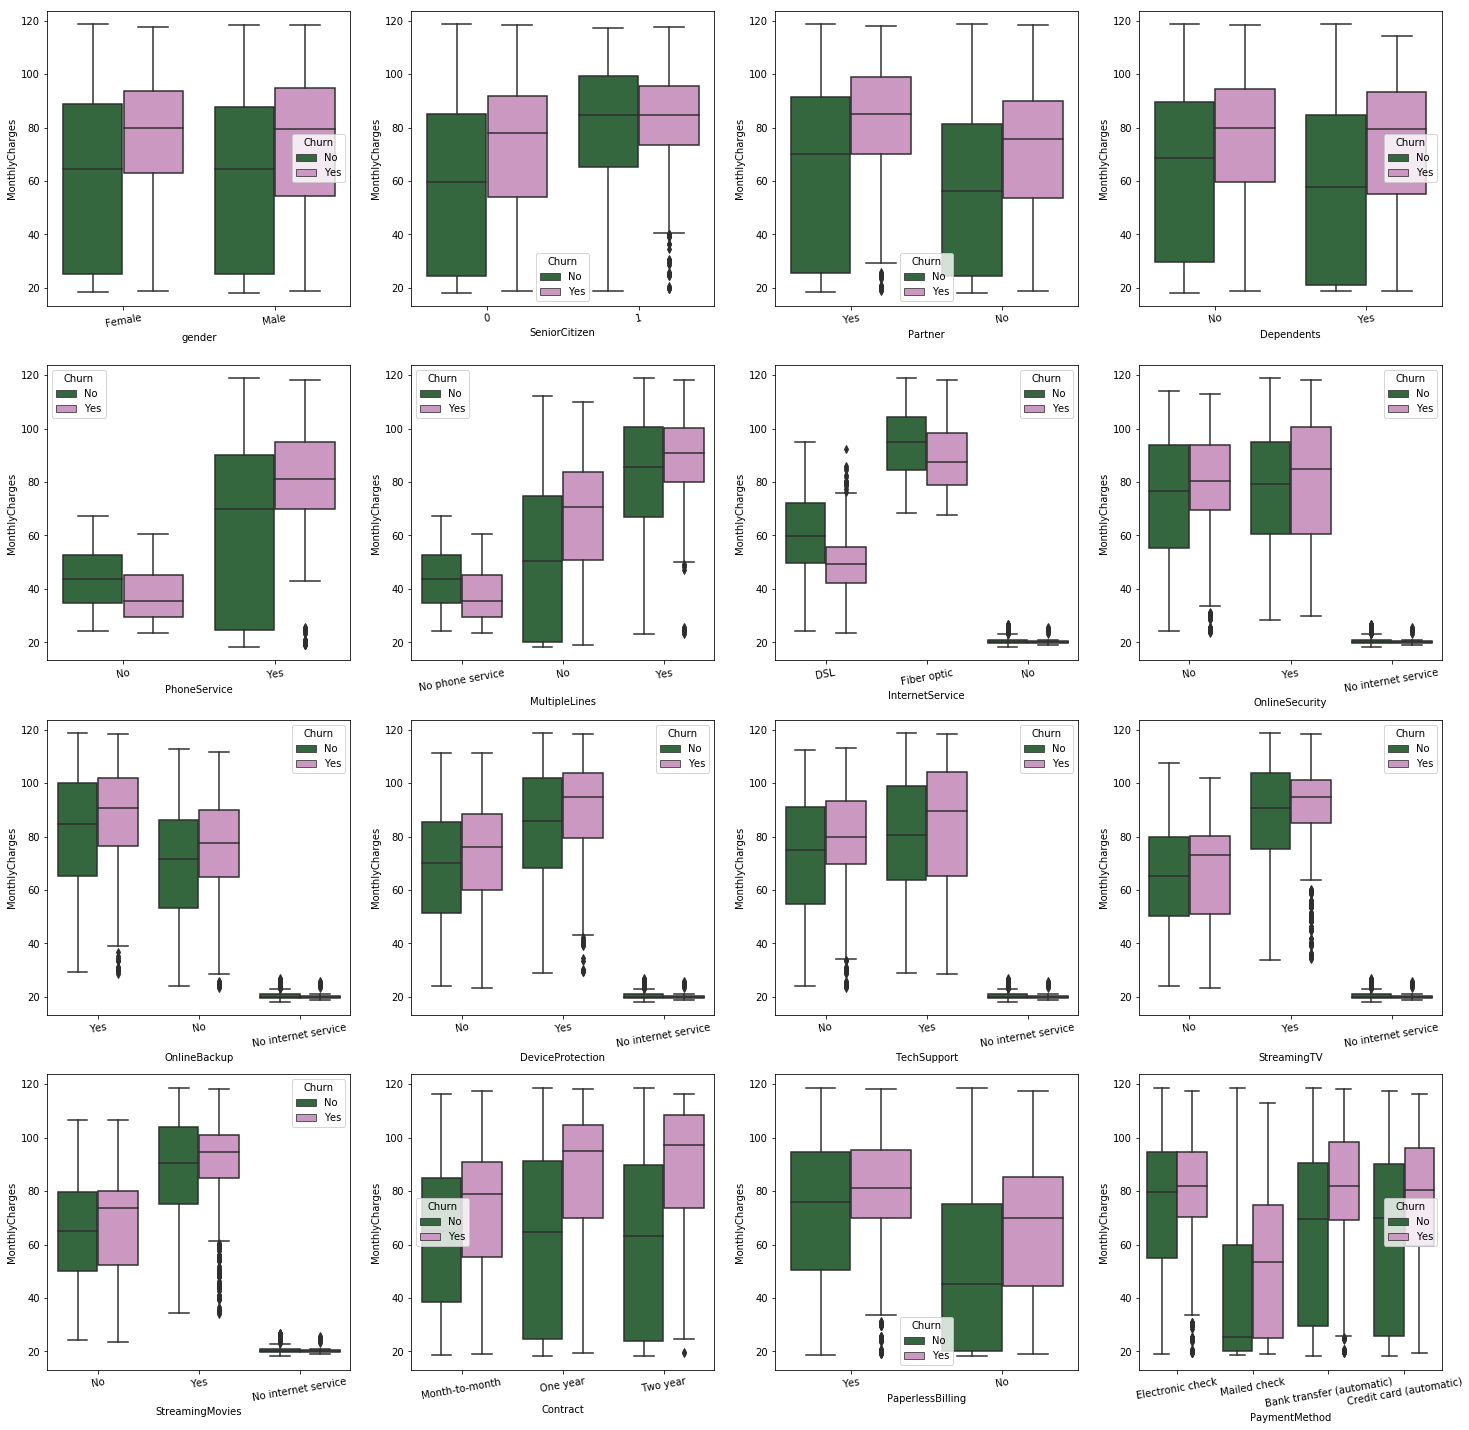

In [329]:
boxplots(categoricals,'MonthlyCharges', 10)

#### Customer Profile
1. *gender*: While there is no significant difference between the genders, it seems that women tolerate higher values of monthly charges.
2. *Senior Citizen*: Generally senior citizens tend to pay more, whether they leave or not.
3. *Partner*: It seems having no partner effect the decision to leave the service - the customers without one leave at lower monthly charges.
4. *Dependents*: No significant difference between both.

#### Service with the telecom
1. *Phone Service*: It appears that the users that have a phone service are more 'tolerant' to higher monthly charges.
2. *MultipleLines*:  Having multiple lines it is not so dependant on the monthly charges, however it is clearly visible that the ones that don't and pay more - leave.
3. *InternetService*: DSL and fiber optic exhibit the same behavior - the customers, who leave, pay less.

#### Supplemental services
1. *OnlineSecurity*, *OnlineBackupt*, *DeviceProtection*: It seems that the biggest difference between is in the amount being paid monthly, with users who pay more - leave.
2. *Tech Support*: It appears that having tech support allows for higher monthly charges, but there seems to be a top threshold of a monthly charge that a user can tolerate.
3. *StreamingTV*,*StreamingMovies*: Both streaming services have the same behaviour and do not appear to be a differentiatior.

#### Contract Settings
1. *Contract*: The highr the contract duration - the higher the monthly charge a user can accept before leaving.
2. *Paperless Biling*: Again the monthly charges are the main driver here, but 75% with paperless biling are willing to accept costs up to 100 per month.
3. *Payment Method*: Both automatic transfer methods seem to correlate to a higher monthly charge for the customers who leave.

#### Conclusion
From the boxplots it seems that there is a threshold of Monthly charges, which the user is willing to accept. Let's examine that angle.

In [463]:
df_max = np.ceil(df['MonthlyCharges'].max()/10)*10
df_min = np.floor(df['MonthlyCharges'].min()/10)*10
charges_range = np.linspace(df_min, df_max, 12)

In [464]:
ranges = pd.cut(df[df['Churn'] == 'Yes']['MonthlyCharges'], charges_range).value_counts().sort_index().index
churn_yes = list(pd.cut(df[df['Churn'] == 'Yes']['MonthlyCharges'], charges_range).value_counts().sort_index().values)
churn_no = list(pd.cut(df[df['Churn'] == 'No']['MonthlyCharges'], charges_range).value_counts().sort_index().values)
df_hist = pd.DataFrame({'ranges': ranges, 'churn_yes': churn_yes, 'churn_no': churn_no})

df_hist['total_users'] = df_hist['churn_yes'] + df_hist['churn_no']
df_hist['churn_yes_perc'] = round(df_hist['churn_yes'] / df_hist['total_users'] * 100, 2)
df_hist['churn_no_pers'] = round(df_hist['churn_no'] / df_hist['total_users'] * 100, 2)
df_hist['total_perc'] = 100

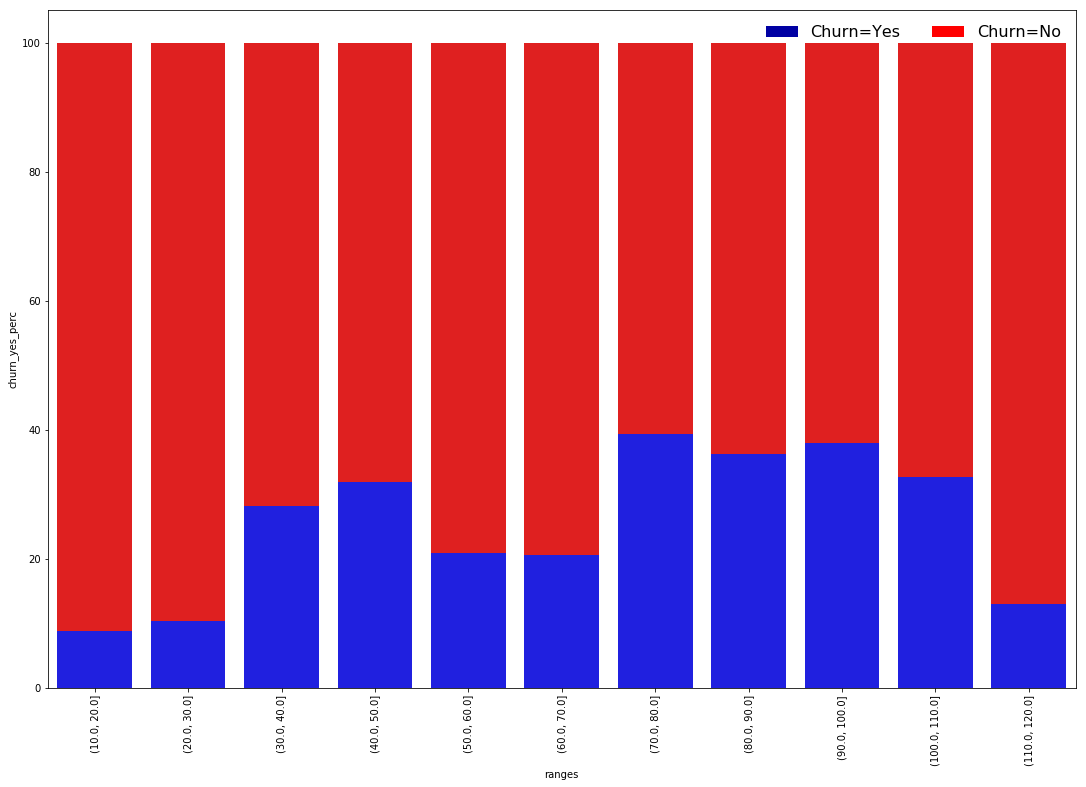

In [465]:
plt.subplots(1, figsize=(15,10))
plt.tight_layout()
g = sns.barplot(x='ranges', y='total_perc', data=df_hist, color='red')
g = sns.barplot(x='ranges', y='churn_yes_perc', data=df_hist, color='blue')
plt.setp(g.axes.xaxis.get_majorticklabels(), rotation=90)
# Legend
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Churn=Yes', 'Churn=No'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

A similar plot to the KDEplot. It seems that a good amount of leaving users are between *Monthly Charges* between 70 and 110. If a user has a *Monthly Charge* between those values - he is likely to churn.

## 4. 'Customer, that leaves' Profile
According to the data the customer that leaves is
1. Has no partners.
2. Has no dependants.
3. Has a fiber-optic internet service.
4. Has no tech-support.
5. Has a 'Month-to-Month' contract.
6. Pays via 'Electronic check'.
7. Pays between 70 to 110.
8. Has been with the telecom for a short time.